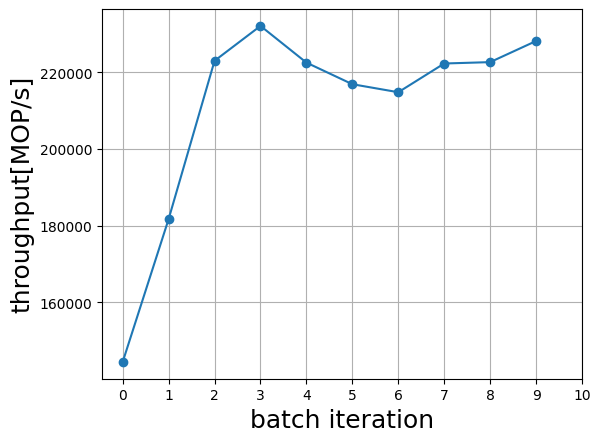

In [27]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plus = lambda x, y : x + y
file_name = "host_app_UPMEM_UPMEM_100000"
def makefigure_migration(file_name):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    throughput = []
    preprocess_time1 = []
    preprocess_time2 = []
    preprocess_time = []
    migration_time = []
    send_time = []
    execution_time = []
    recieve_result_time = []
    df = pd.read_csv("../data/ppl_2024/" + file_name + ".csv")
    x_axis = list(range(len(df)))
    #result += df['Time'].values.tolist()
    migration_time += df[' migration_time'].values.tolist()
    send_time += df[' send_time'].values.tolist()
    execution_time += df[' execution_time'].values.tolist()
    preprocess_time1 += df[' preprocess_time1'].values.tolist()
    preprocess_time2 += df[' preprocess_time2'].values.tolist()
    preprocess_time += map(plus, preprocess_time1, preprocess_time2)
    recieve_result_time += df[' recieve_result_time'].values.tolist()
    throughput += df[' throughput'].values.tolist()
    plt.rcParams["savefig.dpi"] = 300
    plt.xlabel('batch iteration',fontsize=18)
    ax1.set_ylabel('throughput[MOP/s]',fontsize=18)
    ax1.plot(x_axis[:len(df)-1], throughput[:len(df)-1], marker='o')
    plt.xticks(x_axis)
    plt.grid()
    fig.subplots_adjust(left=0.15)
    plt.savefig("../graphs/ppl2024/" + file_name + ".png",transparent = False)
    plt.show()
makefigure_migration(file_name)

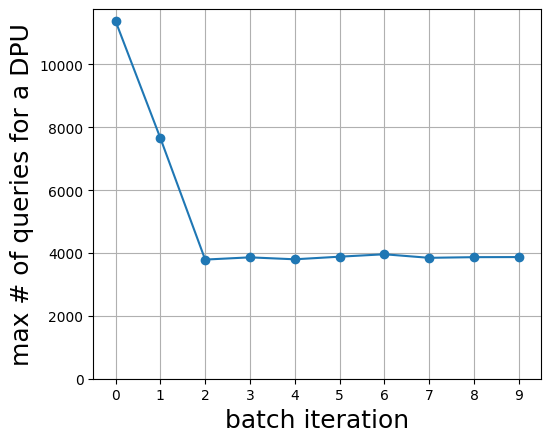

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plus = lambda x, y : x + y
file_name = "host_app_UPMEM_UPMEM_100000"
def time_bar_migration(file_name):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    send_size = []
    df = pd.read_csv("../data/ppl_2024/" + file_name + ".csv")
    x_axis = list(range(len(df) - 1))
    send_size += df[' max_query_num'].values.tolist()
    plt.rcParams["savefig.dpi"] = 300
    plt.xlabel('batch iteration',fontsize=18)
    ax1.set_ylabel('max # of queries for a DPU',fontsize=18)
    ax1.plot(x_axis[:len(df)-1], send_size[:len(df)-1], marker='o')
    plt.xticks(x_axis)
    plt.grid()
    ax1.set_xlim(-0.5,len(df) - 1.5)
    ax1.set_ylim(0,)
    fig.subplots_adjust(left=0.2)
    plt.savefig("../graphs/ppl2024/" + file_name + "_max_query_num.png",transparent = False)
    plt.show()
time_bar_migration(file_name)

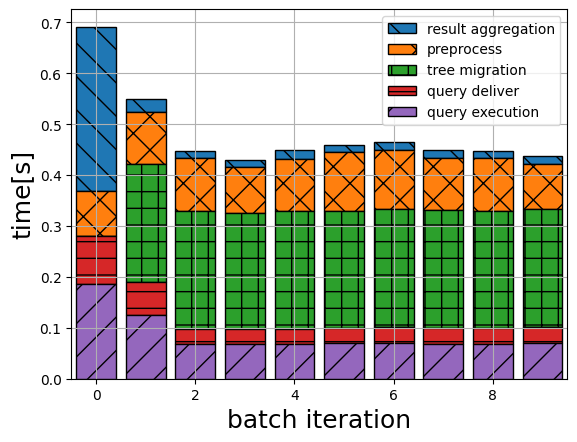

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plus = lambda x, y : x + y
file_name = "host_app_UPMEM_UPMEM_100000"
def time_bar_migration(file_name):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    throughput = []
    preprocess_time1 = []
    preprocess_time2 = []
    preprocess_time = []
    migration_time = []
    send_time = []
    execution_time = []
    recieve_result_time = []
    df = pd.read_csv("../data/ppl_2024/" + file_name + ".csv")
    x_axis = list(range(len(df) - 1))
    migration_time += df[' migration_time'].values.tolist()
    send_time += df[' send_time'].values.tolist()
    execution_time += df[' execution_time'].values.tolist()
    preprocess_time1 += df[' preprocess_time1'].values.tolist()
    preprocess_time2 += df[' preprocess_time2'].values.tolist()
    preprocess_time += map(plus, preprocess_time1, preprocess_time2)
    recieve_result_time += df[' recieve_result_time'].values.tolist()
    throughput += df[' throughput'].values.tolist()
    plt.rcParams["savefig.dpi"] = 300
    plt.xlabel('batch iteration',fontsize=18)
    ax1.set_ylabel('time[s]',fontsize=18)
    ax1.bar(x_axis, recieve_result_time[:len(df) - 1],bottom=[execution_time[i]+ send_time[i] + migration_time[i] + preprocess_time[i] for i in range(len(df) - 1)], label = "result aggregation", edgecolor='black', hatch="\\")
    ax1.bar(x_axis, preprocess_time[:len(df) - 1],bottom=[execution_time[i]+ send_time[i] + migration_time[i] for i in range(len(df) - 1)], label = "preprocess", edgecolor='black', hatch="x")
    ax1.bar(x_axis, migration_time[:len(df) - 1],bottom=[execution_time[i]+ send_time[i] for i in range(len(df) - 1)], label = "tree migration", edgecolor='black', hatch="+")
    ax1.bar(x_axis, send_time[:len(df) - 1],bottom=execution_time[:len(df) - 1], label = "query deliver", edgecolor='black', hatch="-")
    ax1.bar(x_axis, execution_time[:len(df) - 1],label = "query execution", edgecolor='black', hatch="/")
    #plt.xticks(x_axis)
    plt.grid()
    fig.subplots_adjust()
    plt.legend()
    ax1.set_xlim(-0.5,len(df) - 1.5)
    #ax1.set_ylim(0,2.5)
    fig.subplots_adjust()
    plt.savefig("../graphs/ppl2024/" + file_name + "_breakdown.png",transparent = False)
    plt.show()
time_bar_migration(file_name)